# 決定木

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# ジュピターノートブック上でグラフを表示させるための処理
%matplotlib inline

import mglearn

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 決定木の可視化をするために必要
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import graphviz

## データセットの準備

In [2]:
# データセットの生成
X, y = mglearn.datasets.make_forge()

print(X)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


X.shape: (26, 2)


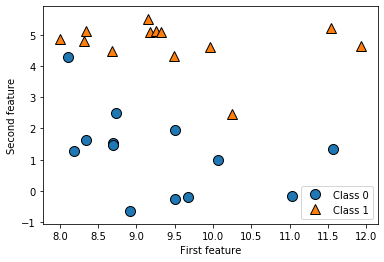

In [3]:
# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

⬆︎ X.shapeからわかるように、このデータセットは、2つの特徴量を持つ26のデータポイントで構成されている。

In [5]:
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


⬆︎このデータセットは、30の特徴量を持つ569のデータポイントで構成されている。

In [8]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


⬆︎ 569のデータポイントのうち、212が悪性で357が良性である。\

Sample counts per class: クラスごとのサンプルの個数\
benign: 357\
malignant: 212

In [9]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


⬆︎個々の特徴量の意味を示す記述は、feature_names属性に格納されている。

In [12]:
# トレーニングデータセットとテストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

## 決定木の解析

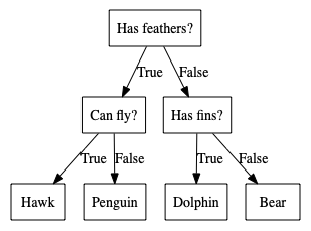

In [10]:
mglearn.plots.plot_animal_tree()

### 決定木の葉をピュア(純粋、過学習)の状態にしてモデルを作成

In [13]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [14]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


### 決定木の深さを指定して過学習を防ぐ

In [15]:
tree2 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [16]:
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### 決定木の可視化

In [18]:
export_graphviz(tree2, 
                              out_file="tree.dot", 
                              class_names=["malignant", "benign"], 
                              feature_names=cancer.feature_names, 
                              impurity=False, 
                              filled=True)

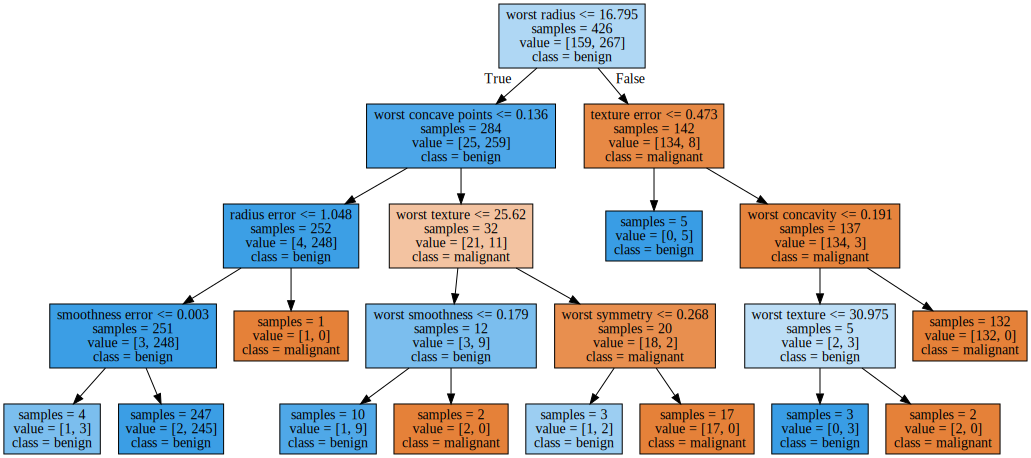

In [20]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

⬆︎ 決定木を検証するよい方法の1つは、`大多数のデータがたどるパス`を見つけることである。

図の内のパラメータについて
- samplesはそのノードにあるサンプルの個数を示す。
- valueはクラスごとのサンプルの個数を示す。

### 決定木の特徴量の重要性

決定木全体を見るのは大変なので、決定木から導出できる、決定木の挙動を要約する特性値を調べる。

要約に最もよく使われるのは、特徴量の重要度(feature importance)と呼ばれる、決定木が行う判断にとって、個々の特徴量がどの程度重要かを示す割合である。
  - それぞれの特徴量に対する0と1の間の数で、0は「まったく使われていない」、1は「完全にターゲットを予想できる」を意味する。
  - 特徴量の重要度の和は常に1になる。

In [21]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


#### 特徴量の重要度の可視化

In [22]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

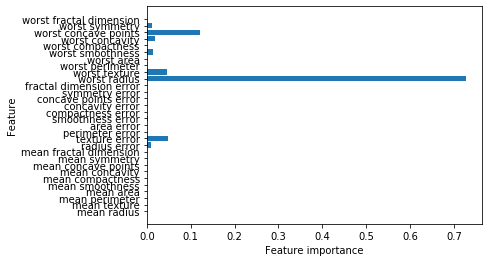

In [23]:
plot_feature_importances_cancer(tree2)

Feature importances: [0. 1.]


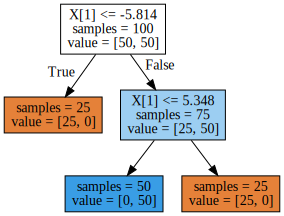

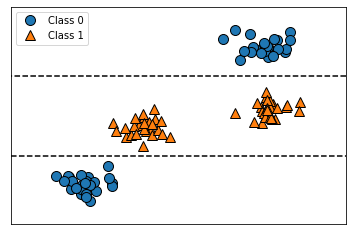

In [25]:
tree3 = mglearn.plots.plot_tree_not_monotone()
display(tree3)

## 決定木のアンサンブル法

アンサンブル法(Ensembles)とは、複数の機械学習モデルを組み合わせることで、より強力なモデルを構築する手法である。

## ランダムフォレスト

決定木の最大の問題点は訓練データに対して過剰適合してしまうことにある。ランダムフォレストはこの問題に対応する手法の1つである。

ランダムフォレストとは、少しずつ異なる決定木をたくさん集めたものである。ランダムフォレストは、個々の決定木は比較的うまく予測できているが、一部のデータに対して過剰適合してしまっているという考えに基づいている。

それぞれ異なった方向に過剰適合した決定木をたくさん作れば、`その結果の平均`を取ることで過剰適合の度合いを減らすことができる。

### ランダムフォレストの解析

In [27]:
X2, y2 = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=y2, random_state=42)

In [28]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

⬆︎ ランダムフォレストの一部として構築された決定木はestimator_属性に格納されている。

#### それぞれの決定木で学習された決定境界とランダムフォレストによって行われる集合的な予測を可視化

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


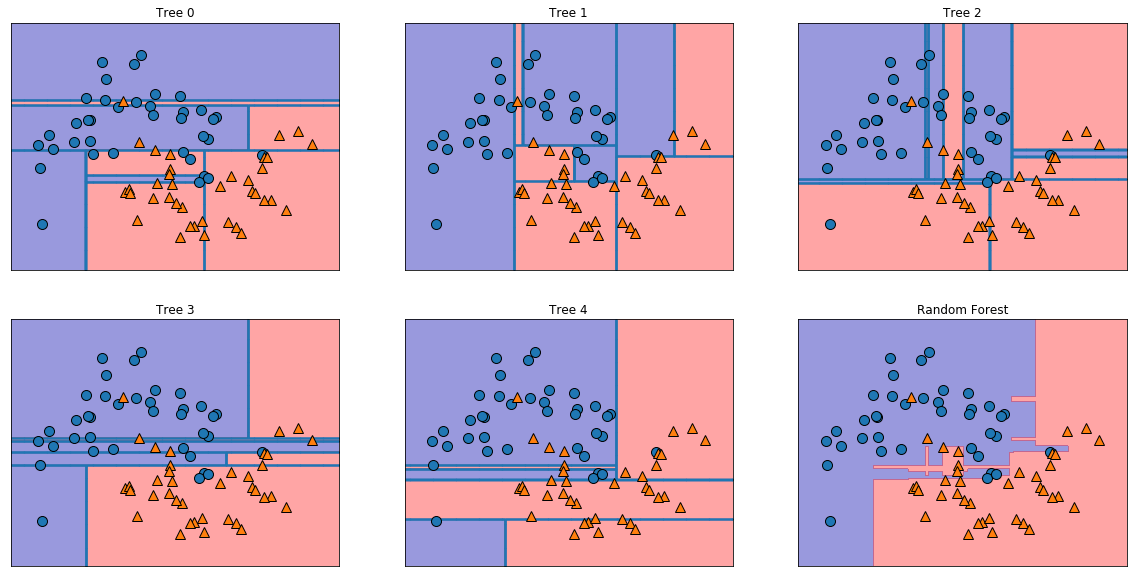

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train2, y_train2, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train2, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train2[:, 0], X_train2[:, 1], y_train2)

⬆︎5つのランダム化された決定木による決定境界と、それらを平均して得られた決定境界

#### cancerデータセットを用いてランダムフォレストを適用する

In [30]:
forest2 = RandomForestClassifier(n_estimators=100, random_state=0)
forest2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
print("Accuracy on training set: {:.3f}".format(forest2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest2.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


### ランダムフォレストによる特徴量の重要度の可視化

ランダムフォレストによる特徴量の重要度は個々の決定木の特徴量の重要度を平均したものである。

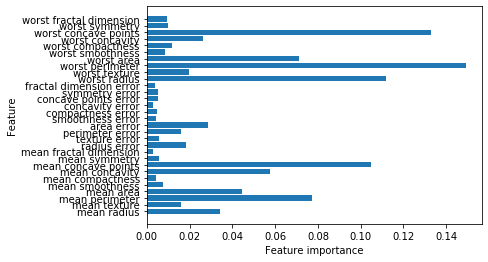

In [32]:
plot_feature_importances_cancer(forest2)